# 0. Setup Paths

In [50]:
!pip3 install opencv-python

In [51]:
import os
import cv2

ModuleNotFoundError: No module named 'cv2'

In [73]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [74]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [75]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [8]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [74]:
if os.name=='nt':
    !pip3 install wget
    import wget

In [75]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [76]:
!pip3 install --no-cache-dir  --force-reinstall -Iv grpcio==1.36.1

Using pip 23.1.2 from /Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 9.5 MB/s eta 0:00:0000:0100:01
  Running command python setup.py egg_info
  /private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-install-xygkn9gc/grpcio_27e6899f3c2f433e84091841ec12244b/setup.py:31: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  Found cython-generated files...
  running egg_info
  creating /private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-pip-egg-info-arsyqeqy/grpcio.egg-info
  writing /private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-pip-egg-info-arsyqeqy/grpcio.egg-info/PKG-INFO
  writing dependency_links to /private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-pip-egg-info-arsyqeqy/grpcio.egg-info/dependency_links.txt
  writing requirements to /private/

  Found cython-generated files...
  building 'grpc._cython.cygrpc' extension
  creating python_build/temp.macosx-13.4-x86_64-cpython-310
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/ext
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/ext/filters
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/ext/filters/census
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/ext/filters/client_channel
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/ext/filters/client_channel/health
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/ext/filters/client_channel/lb_policy
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/ext/filters/client_channel/lb_policy/grpclb
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/src/core/e

  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/base
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/base/internal
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/container
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/container/internal
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/debugging
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/debugging/internal
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/hash
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/hash/internal
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/numeric
  creating python_build/temp.macosx-13.4-x86_64-cpython-310/third_party/abseil-cpp/absl/status
  creatin

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/config/route/v3/route.upbdefs.c -o python_b

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/src/proto/grpc/health/v1/health.upb.c -o python_build

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/src/proto/grpc/lb/v1/load_balancer.upb.c -o python_bu

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/config/core/v3/base.upbdefs.c -o python_bui

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/extensions/filters/network/http_connection_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/envoy/type/v3/percent.upb.c -o python_build/temp.maco

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/envoy/type/v3/range.upb.c -o python_build/temp.macosx

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/extensions/transport_sockets/tls/v3/secret.

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/extensions/transport_sockets/tls/v3/tls.upb

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/envoy/config/core/v3/health_check.upb.c -o python_bui

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/service/discovery/v3/ads.upbdefs.c -o pytho

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/transport/chttp2/transport/frame_rst_stream.cc -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/google/protobuf/descriptor.upb.c -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/xds/core/v3/resource_locator.upb.c -o python_build/te

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/google/protobuf/empty.upb.c -o python_build/temp.maco

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/envoy/service/discovery/v3/discovery.upb.c -o python_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/annotations/resource.upbdefs.c -o python_bu

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/envoy/type/matcher/v3/metadata.upbdefs.c -o pytho

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/udpa/annotations/sensitive.upbdefs.c -o python_bu

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/envoy/service/route/v3/srds.upb.c -o python_build/tem

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/gpr/cpu_windows.cc -o python_build/temp.macosx-13.4-x86_64-cpython-

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/gpr/tmpfile_posix.cc -o python_build/temp.macosx-13.4-x86_64-cpytho

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upbdefs-generated/xds/core/v3/resource_locator.upbdefs.c -o python_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/workarounds/workaround_cronet_compression_filter.cc -o pyth

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/gprpp/arena.cc -o python_build/temp.macosx-13.4-x86_64-cpython-310/

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/workarounds/workaround_utils.cc -o python_build/temp.macosx

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/pollset_windows.cc -o python_build/temp.macosx-13.4-x86_64-cp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/gpr/murmur_hash.cc -o python_build/temp.macosx-13.4-x86_64-cpython-

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/iomgr_posix.cc -o python_build/temp.macosx-13.4-x86_64-cpytho

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/gpr/sync_posix.cc -o python_build/temp.macosx-13.4-x86_64-cpython-3

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/iomgr_posix_cfstream.cc -o python_build/temp.macosx-13.4-x86_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/gprpp/mpscq.cc -o python_build/temp.macosx-13.4-x86_64-cpython-310/

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/lockfree_event.cc -o python_build/temp.macosx-13.4-x86_64-cpy

  src/core/ext/transport/chttp2/transport/hpack_parser.cc:1028:5: warning: code will never be executed [-Wunreachable-code]
      gpr_log(GPR_INFO, "MAX TABLE SIZE: %d", p->index);
      ^~~~~~~
  src/core/lib/iomgr/lockfree_event.cc:99:7: warning: code will never be executed [-Wunreachable-code]
        gpr_log(GPR_DEBUG,
        ^~~~~~~
  src/core/lib/iomgr/lockfree_event.cc:168:7: warning: code will never be executed [-Wunreachable-code]
        gpr_log(GPR_DEBUG,
        ^~~~~~~
  src/core/lib/iomgr/lockfree_event.cc:218:7: warning: code will never be executed [-Wunreachable-code]
        gpr_log(GPR_DEBUG, "LockfreeEvent::SetReady: %p curr=%" PRIxPTR, &state_,
        ^~~~~~~
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABL

  1 warning generated.
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/transport/chttp2/transport/hpack_table.cc -o

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/poller/eventmanager_libuv.cc -o python_build/temp.macosx-13.4

  src/core/lib/iomgr/ev_poll_posix.cc:577:5: warning: code will never be executed [-Wunreachable-code]
      gpr_log(GPR_ERROR, "Polling engine does not support tracking errors.");
      ^~~~~~~
  src/core/lib/iomgr/ev_poll_posix.cc:596:5: warning: code will never be executed [-Wunreachable-code]
      gpr_log(GPR_ERROR, "Polling engine does not support tracking errors.");
      ^~~~~~~
  src/core/lib/iomgr/ev_poll_posix.cc:1065:15: warning: code will never be executed [-Wunreachable-code]
                gpr_log(GPR_INFO, "%p got_event: %d r:%d w:%d [%d]", pollset,
                ^~~~~~~
  src/core/lib/iomgr/ev_poll_posix.cc:1055:13: warning: code will never be executed [-Wunreachable-code]
              gpr_log(GPR_INFO, "%p: got_wakeup", pollset);
              ^~~~~~~
  src/core/lib/iomgr/ev_poll_posix.cc:1031:9: warning: code will never be executed [-Wunreachable-code]
          gpr_log(GPR_INFO, "%p poll=%d", pollset, r);
          ^~~~~~~
  clang -Wno-unused-result -Wsign-compa

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/http/httpcli.cc -o python_build/temp.macosx-13.4-x86_64-cpython-310

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/socket_utils_linux.cc -o python_build/temp.macosx-13.4-x86_64

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/channel/status_util.cc -o python_build/temp.macosx-13.4-x86_64-cpyt

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/executor/mpmcqueue.cc -o python_build/temp.macosx-13.4-x86_64

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/tcp_client_custom.cc -o python_build/temp.macosx-13.4-x86_64-

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/compression/compression_internal.cc -o python_build/temp.macosx-13.

  1 warning generated.
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/fork_posix.cc -o python_build/temp.mac

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/iomgr/tcp_server_utils_posix_noifaddrs.cc -o python_build/temp.maco

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/slice/b64.cc -o python_build/temp.macosx-13.4-x86_64-cpython-310/sr

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/transport/inproc/inproc_transport.cc -o python_build/temp.macosx-13

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/credentials/credentials_metadata.cc -o python_build/temp.m

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/envoy/config/accesslog/v3/accesslog.upb.c -o python_b

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/upb-generated/envoy/config/cluster/v3/cluster.upb.c -o python_build

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/credentials/tls/tls_credentials.cc -o python_build/temp.ma

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/authorization/authorization_engine.cc -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/client_channel/service_config.cc -o python_build/temp.macos

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/gpr/cpu_linux.cc -o python_build/temp.macosx-13.4-x86_64-cpython-31

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/tsi/alts/frame_protector/alts_record_protocol_crypter_common.cc -o pyth

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/client_channel/service_config_channel_arg_filter.cc -o pyth

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/authorization/matchers.cc -o python_build/temp.macosx-13.4

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/client_channel/http_proxy.cc -o python_build/temp.macosx-13

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/client_channel/subchannel.cc -o python_build/temp.macosx-13

  src/core/ext/filters/client_channel/subchannel.cc:92:17: warning: code will never be executed [-Wunreachable-code]
                ? "ConnectedSubchannel"
                  ^~~~~~~~~~~~~~~~~~~~~
  src/python/grpcio/grpc/_cython/cygrpc.cpp:40773:3: warning: code will never be executed [-Wunreachable-code]
    __Pyx_pretend_to_initialize(&__pyx_r);
    ^~~~~~~~~~~~~~~~~~~~~~~~~~~
  src/python/grpcio/grpc/_cython/cygrpc.cpp:42653:46: warning: code will never be executed [-Wunreachable-code]
    __pyx_r = (grpc_ssl_roots_override_result) 0;
                                               ^
  src/python/grpcio/grpc/_cython/cygrpc.cpp:48156:5: warning: code will never be executed [-Wunreachable-code]
      PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      ^~~~~~~~~~~~~~~
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.

  src/python/grpcio/grpc/_cython/cygrpc.cpp:98210:3: warning: code will never be executed [-Wunreachable-code]
    CYTHON_MAYBE_UNUSED_VAR(__pyx_cur_scope);
    ^~~~~~~~~~~~~~~~~~~~~~~
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documen

  1 warning generated.
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/client_channel/subchannel_pool_inter

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/credentials/external/url_external_account_credentials.cc -

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/security_connector/security_connector.cc -o python_build/t

  2 warnings generated.
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/xds/xds_client_stats.cc -o python_build/tem

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/abseil-cpp/absl/numeric/int128.cc -o python_build/temp.macosx-13.4-x

  In file included from src/core/ext/xds/xds_client_stats.cc:28:
  In file included from ./src/core/ext/xds/xds_client.h:32:
  ./src/core/lib/gprpp/dual_ref_counted.h:173:20: warning: unused variable 'weak_refs' [-Wunused-variable]
      const uint32_t weak_refs = GetWeakRefs(prev_ref_pair);
                     ^
  ./src/core/lib/gprpp/dual_ref_counted.h:195:20: warning: unused variable 'weak_refs' [-Wunused-variable]
      const uint32_t weak_refs = GetWeakRefs(prev_ref_pair);
                     ^
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird

  2 warnings generated.
  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/xds/xds_server_config_fetcher.cc -o python_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/security_connector/ssl_utils_config.cc -o python_build/tem

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/abseil-cpp/absl/strings/string_view.cc -o python_build/temp.macosx-1

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/abseil-cpp/absl/strings/substitute.cc -o python_build/temp.macosx-13

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/transport/client_auth_filter.cc -o python_build/temp.macos

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/abseil-cpp/absl/time/internal/cctz/src/time_zone_fixed.cc -o python_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/channel/channel_stack.cc -o python_build/temp.macosx-13.4-x86_64-cp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/transport/security_handshaker.cc -o python_build/temp.maco

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/client_channel/resolver/dns/c_ares/grpc_ares_ev_driver_posi

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/mac-x86_64/crypto/fipsmodule/sha512-x86_64.S -o

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/abseil-cpp/absl/time/internal/cctz/src/time_zone_impl.cc -o python_b

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/tsi/alts/crypt/aes_gcm.cc -o python_build/temp.macosx-13.4-x86_64-cpyth

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/asn1/a_d2i_fp.c -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/bio/fd.c -o python_build/temp.macosx

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/asn1/asn1_lib.c -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/cipher_extra/e_chacha20poly1305.c -o

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/cipher_extra/e_null.c -o python_buil

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/evp/p_x25519_asn1.c -o python_build/

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/cipher_extra/e_tls.c -o python_build

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/buf/buf.c -o python_build/temp.macos

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/ex_data.c -o python_build/temp.macos

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/cpu-aarch64-fuchsia.c -o python_buil

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/asn1/time_support.c -o python_build/

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/pem/pem_xaux.c -o python_build/temp.

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/cipher_extra/derive_key.c -o python_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/ext/filters/client_channel/resolver/dns/c_ares/grpc_ares_wrapper_posix.

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/thread_win.c -o python_build/temp.ma

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/pkcs8/pkcs8_x509.c -o python_build/t

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/poly1305/poly1305.c -o python_build/

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509/x_attrib.c -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509/a_sign.c -o python_build/temp.m

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509v3/v3_akeya.c -o python_build/te

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509/x509_req.c -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509/x509_set.c -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c src/core/lib/security/credentials/plugin/plugin_credentials.cc -o python_build/t

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509/x_spki.c -o python_build/temp.m

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/curve25519/spake25519.c -o python_bu

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/ssl/ssl_key_share.cc -o python_build/temp.m

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509/x509_vpm.c -o python_build/temp

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509v3/pcy_map.c -o python_build/tem

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/cares/cares/ares_free_string.c -o python_build/temp.macosx-13.4-x86_

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/x509v3/v3_akey.c -o python_build/tem

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/cares/cares/ares_parse_ptr_reply.c -o python_build/temp.macosx-13.4-

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/cares/cares/ares_init.c -o python_build/temp.macosx-13.4-x86_64-cpyt

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/cares/cares/ares_mkquery.c -o python_build/temp.macosx-13.4-x86_64-c

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/ssl/ssl_privkey.cc -o python_build/temp.mac

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/cares/cares/ares_strerror.c -o python_build/temp.macosx-13.4-x86_64-

  third_party/zlib/inflate.c:1277:13: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  int ZEXPORT inflateEnd(strm)
              ^
  third_party/zlib/inflate.c:1291:13: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  int ZEXPORT inflateGetDictionary(strm, dictionary, dictLength)
              ^
  third_party/zlib/inflate.c:1314:13: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  int ZEXPORT inflateSetDictionary(strm, dictionary, dictLength)
              ^
  third_party/zlib/inflate.c:1349:13: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  int ZEXPORT inflateGetHeader(strm, head)
              ^
  th

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/ssl/ssl_session.cc -o python_build/temp.mac

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/cares/cares/windows_port.c -o python_build/temp.macosx-13.4-x86_64-c

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/mac-x86_64/crypto/fipsmodule/aesni-gcm-x86_64.S

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/re2/re2/dfa.cc -o python_build/temp.macosx-13.4-x86_64-cpython-310/t

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/upb/upb/msg.c -o python_build/temp.macosx-13.4-x86_64-cpython-310/th

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/ssl/handshake_client.cc -o python_build/tem

  third_party/zlib/crc32.c:202:23: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  unsigned long ZEXPORT crc32_z(crc, buf, len)
                        ^
  third_party/zlib/crc32.c:237:23: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  unsigned long ZEXPORT crc32(crc, buf, len)
                        ^
  third_party/zlib/crc32.c:266:21: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  local unsigned long crc32_little(crc, buf, len)
                      ^
  third_party/zlib/crc32.c:266:21: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  third_party/zlib/crc32.c:306:21: warning: a function declaration

  third_party/zlib/deflate.c:730:12: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  local void flush_pending(strm)
             ^
  third_party/zlib/deflate.c:730:12: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  third_party/zlib/deflate.c:763:13: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  int ZEXPORT deflate (strm, flush)
              ^
  third_party/zlib/deflate.c:1076:13: warning: a function declaration without a prototype is deprecated in all versions of C and is not supported in C2x [-Wdeprecated-non-prototype]
  int ZEXPORT deflateEnd (strm)
              ^
  third_party/zlib/deflate.c:1102:13: warning: a function declaration without a prototype is deprecated in all versions of C an

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/abseil-cpp/absl/base/internal/low_level_alloc.cc -o python_build/tem

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/ssl/t1_lib.cc -o python_build/temp.macosx-1

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/re2/re2/onepass.cc -o python_build/temp.macosx-13.4-x86_64-cpython-3

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/hkdf/hkdf.c -o python_build/temp.mac

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/ssl/tls13_server.cc -o python_build/temp.ma

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/crypto/obj/obj_xref.c -o python_build/temp.

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/boringssl-with-bazel/src/ssl/tls_record.cc -o python_build/temp.maco

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/cares/cares/ares__timeval.c -o python_build/temp.macosx-13.4-x86_64-

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/abseil-cpp/absl/debugging/internal/elf_mem_image.cc -o python_build/

  clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 "-DPyMODINIT_FUNC=extern \"C\" __attribute__((visibility (\"default\"))) PyObject*" -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/abseil-cpp -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/re2 -Ithird_party/boringssl-with-bazel/src/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Isrc/core/ext/upbdefs-generated -Ithird_party/zlib "-I/Users/yogi/Documents/Object Detection/TFODCourse/tfod/include" -I/Users/yogi/.pyenv/versions/3.10.12/include/python3.10 -c third_party/re2/re2/stringpiece.cc -o python_build/temp.macosx-13.4-x86_64-cpyth

    File "/private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-install-xygkn9gc/grpcio_27e6899f3c2f433e84091841ec12244b/src/python/grpcio/commands.py", line 250, in new_compile
      return old_compile(obj, src, ext, cc_args, extra_postargs,
    File "/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/setuptools/_distutils/unixccompiler.py", line 187, in _compile
      raise CompileError(msg)
  distutils.errors.CompileError: command '/usr/bin/clang' failed with exit code 1

  During handling of the above exception, another exception occurred:

  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "/private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-install-xygkn9gc/grpcio_27e6899f3c2f433e84091841ec12244b/setup.py", line 473, in <module>
      setuptools.setup(
    File "/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-pack

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  full command: '/Users/yogi/Documents/Object Detection/TFODCourse/tfod/bin/python3' -u -c '
  exec(compile('"'"''"'"''"'"'
  # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
  #
  # - It imports setuptools before invoking setup.py, to enable projects that directly
  #   import from `distutils.core` to work with newer packaging standards.
  # - It provides a clear error message when setuptools is not installed.
  # - It sets `sys.argv[0]` to the underlying `setup.py`, when invoking `setup.py` so
  #   setuptools doesn'"'"'t think the script is `-c`. This avoids the following warning:
  #     manifest_maker: standard file '"'"'-c'"'"' not found".
  # - It generates a shim setup.py, for handling setup.cfg-only projects.
  import os

In [77]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !pip3 install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python3.10 -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip3 install -e . 

  Using cached protobuf_compiler-1.0.20-py3-none-any.whl (8.6 kB)
  Using cached grpcio-1.18.0.tar.gz (14.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached grpcio_tools-1.18.0-cp310-cp310-macosx_13_0_x86_64.whl
  Using cached colorama-0.3.3-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tqdm-4.31.1-py2.py3-none-any.whl (48 kB)
  Using cached bleach-2.1-py2.py3-none-any.whl (27 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [106 lines of output]
      /private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-install-z__0a8mi/grpcio_19796bcbdc03406b9a84749a7f98e2aa/setup.py:21: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      Found cython-generated files...
      running bdist_wheel
      running build


Failed to build grpcio
ERROR: Could not build wheels for grpcio, which is required to install pyproject.toml-based projects
Processing /Users/yogi/Documents/Object Detection/TFODCourse/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1655318 sha256=d643458a452b426a0d46804756504dd7ab0d3dc2e02bf0d8e88263ec6005c063
  Stored in directory: /private/var/folders/fj/bhm6pmtx04qc4qczf59qf8lr0000gp/T/pip-ephem-wheel-cache-g3z1xjj_/wheels/4f/60/fa/2d21f4f1643c0e20ef051fc1c2d270e1716ca9d6f6a6e94327
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [7]:
from tensorflow.keras.preprocessing import image as image_ops

2023-07-23 14:26:34.221324: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [79]:
!pip3 install grpcio

In [80]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-07-18 12:53:09.119210: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["dlopen(/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so, 0x0006): symbol not found in flat namespace '__ZN3tsl6Status12empty_stringEv'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.24s
I0718 12:53:19.236809 140704286938688 test_util.py:2462] time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.24s
[       OK ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
[ RUN      ] ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.04s
I0718 12:53:19.273455 140704286938688 test_util.py:2462] time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.04s
[       OK ] ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config
[ RUN      ] ModelBuilderTF2Test.test_create_ssd_models_from_config
I0718 12:53:19.459654 140704286938688 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b0
I0718 12:53:19.459764 140704286938688 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filte

I0718 12:53:22.397918 140704286938688 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b2
I0718 12:53:22.398018 140704286938688 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 112
I0718 12:53:22.398068 140704286938688 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 5
I0718 12:53:22.399776 140704286938688 efficientnet_model.py:143] round_filter input=32 output=32
I0718 12:53:22.412610 140704286938688 efficientnet_model.py:143] round_filter input=32 output=32
I0718 12:53:22.412693 140704286938688 efficientnet_model.py:143] round_filter input=16 output=16
I0718 12:53:22.516710 140704286938688 efficientnet_model.py:143] round_filter input=16 output=16
I0718 12:53:22.516809 140704286938688 efficientnet_model.py:143] round_filter input=24 output=24
I0718 12:53:22.709083 140704286938688 efficientnet_model.py:143] round_filter input=24 output=24
I0718 12:53:22.709185 14

I0718 12:53:26.435481 140704286938688 efficientnet_model.py:143] round_filter input=16 output=24
I0718 12:53:26.435590 140704286938688 efficientnet_model.py:143] round_filter input=24 output=32
I0718 12:53:26.718090 140704286938688 efficientnet_model.py:143] round_filter input=24 output=32
I0718 12:53:26.718191 140704286938688 efficientnet_model.py:143] round_filter input=40 output=56
I0718 12:53:26.997482 140704286938688 efficientnet_model.py:143] round_filter input=40 output=56
I0718 12:53:26.997590 140704286938688 efficientnet_model.py:143] round_filter input=80 output=112
I0718 12:53:27.442162 140704286938688 efficientnet_model.py:143] round_filter input=80 output=112
I0718 12:53:27.442264 140704286938688 efficientnet_model.py:143] round_filter input=112 output=160
I0718 12:53:27.860589 140704286938688 efficientnet_model.py:143] round_filter input=112 output=160
I0718 12:53:27.860690 140704286938688 efficientnet_model.py:143] round_filter input=192 output=272
I0718 12:53:28.460222 

I0718 12:53:34.032715 140704286938688 efficientnet_model.py:143] round_filter input=112 output=200
I0718 12:53:34.032911 140704286938688 efficientnet_model.py:143] round_filter input=192 output=344
I0718 12:53:35.107889 140704286938688 efficientnet_model.py:143] round_filter input=192 output=344
I0718 12:53:35.108150 140704286938688 efficientnet_model.py:143] round_filter input=320 output=576
I0718 12:53:35.399206 140704286938688 efficientnet_model.py:143] round_filter input=1280 output=2304
I0718 12:53:35.449989 140704286938688 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.8, depth_coefficient=2.6, resolution=528, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

In [71]:
!pip3 install Keras-Preprocessing


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [72]:
!pip3 install tensorflow --upgrade

  Using cached protobuf-4.24.1-cp37-abi3-macosx_10_9_universal2.whl (409 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires matplotlib, which is not installed.
tf-models-official 2.13.0 requires matplotlib, which is not installed.
tf-models-official 2.13.0 requires opencv-python-headless, which is not installed.
apache-beam 2.48.0 requires protobuf<4.24.0,>=3.20.3, but you have protobuf 4.24.1 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [13]:
!pip3 uninstall protobuf matplotlib -y
!pip3 install protobuf matplotlib==3.2

Found existing installation: protobuf 4.24.1
Uninstalling protobuf-4.24.1:
  Successfully uninstalled protobuf-4.24.1
  Using cached protobuf-4.24.1-cp37-abi3-macosx_10_9_universal2.whl (409 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 936.1 kB/s eta 0:00:0000:0100:02
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.2.0-cp310-cp310-macosx_13_0_x86_64.whl size=8627804 sha256=1bb355303892952682c21d05786173c13ea5d929b1cd6f6a530b892d7ea5e61d
  Stored in directory: /Users/yogi/Library/Caches/pip/wheels/58/0a/5e/8397500cf9bccc1e8dacd88d51b4fa9f2aa7e45557d97d5490
Successfully built matplotlib
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.13.0 requires opencv-python-headless, which is not installed.
apache-beam 2.48.0 requires protobuf<4.24.0,>=3.20.3, but you have protobuf 4.24.1 whi

In [17]:
import object_detection

In [18]:
!pip3 list

Package                       Version
----------------------------- --------
absl-py                       1.4.0
apache-beam                   2.48.0
appnope                       0.1.3
array-record                  0.4.0
asttokens                     2.2.1
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
bleach                        6.0.0
cachetools                    5.3.1
certifi                       2023.5.7
charset-normalizer            3.2.0
click                         8.1.5
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.3
contextlib2                   21.6.0
contourpy                     1.1.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.36
debugpy                       1.6.7
decorator                     5.1.1
dill                          0.3.1.1
dm-tree                       0.1.8
dnspython     

In [16]:
!wget {PRETRAINED_MODEL_URL}

--2023-08-24 09:01:19--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 2404:f340:4010:180c::2010, 142.251.221.144
Connecting to download.tensorflow.org (download.tensorflow.org)|2404:f340:4010:180c::2010|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   519KB/s    in 52s     

2023-08-24 09:02:12 (384 KB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [41]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-07-18 21:43:36--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.175.128
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.175.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  5.35MB/s    in 3.9s    

2023-07-18 21:43:41 (5.01 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint

# 2. Create Label Map

In [77]:
labels = [{'name':'Strain', 'id':1}, {'name':'Hole', 'id':2}, {'name':'Scratch', 'id':3}, {'name':'Torn', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [43]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [44]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [45]:
!python3.10 {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python3.10 {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [46]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [19]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [68]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [24]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     override_base_feature_extractor_hyperparams: true
     use_depthwise: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10
       x_scale: 10
       height_scale: 5
       width_scale: 5
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
       unmatched

In [92]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [93]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [94]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [95]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [96]:
command = "python3.10 {} --model_dir={} --pipeline_config_path={} --num_train_steps=40000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [97]:
print(command)

python3.10 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=40000


In [68]:
!{command}

/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Traceback (most recent call last):
  File "/Users/yogi/Documents/Object Detection/TFODCourse/Tensorflow/models/research/object_detection/model_main_tf2.py", line 31, in <module>
    import model_lib_v2
  File "/Users/yogi/Documents/Object Detection/TFODCourse/Tensorflow/models/research/object_detection/model_lib_v2.py", line 31, in <module>
    from object_detection import model_lib
  File "/Users/yogi/Documents/Object Detection/TFODCo

# 7. Evaluate the Model

In [126]:
command = "python3.10 {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [127]:
print(command)

python3.10 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [17]:
!{command}

2023-07-18 21:09:02.625621: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["dlopen(/Users/yogi/Documents/Object Detection/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so, 0x0006): symbol not found in flat namespace '__ZN3tsl6Status12empty_stringEv'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}

# 8. Load Train Model From Checkpoint

In [128]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [129]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-40')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [130]:
import os
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [131]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [142]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Torn.1e7619fe-252a-11ee-aed4-acde48001122.jpg')

In [117]:
!pip3 install opencv-python

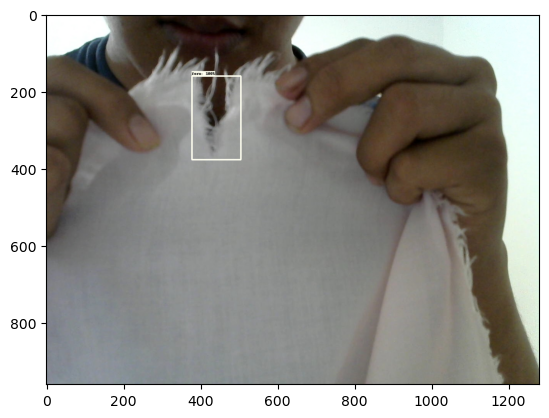

In [143]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [62]:
!pip3 uninstall opencv-python-headless -y

In [144]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

KeyboardInterrupt: 

# 10. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python3.10 {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [18]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS

In [19]:
!pip3 install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python3.10 {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [26]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

2021-04-03 11:55:14.884114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-04-03 11:55:14.884117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-04-03 11:55:14.884182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 6611 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2b:00.0, compute capability: 7.5)
2021-04-03 11:55:14.884197: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W0403 11:55:15.360029 15552 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x00000224AC2B1908>, because it is not built.
W0403 11:55:15.925411 15552 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x00000224D6D42B00>, bec

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [29]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [30]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')